**I made a price prediction by analyzing the Honda branded car dataset**

**with Random Forest**

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
data = pd.read_csv("honda_car_selling.csv")

In [240]:
data.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V


In [241]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [242]:
y = data["Price"]
new_price_array = list()
for i in y.values:
    list1 = i.split(" ")
    if "," in list1[1]:
        change = list1[1].replace(",","")
        new_price_array.append(float(change)/100000)
    else:
        new_price_array.append(float(list1[1]))

In [243]:
# 1 Lakh = 5.253 usd
for i in new_price_array:
    index = new_price_array.index(i)
    new_price_array[index] = i*5253

In [244]:
y = pd.DataFrame(data = new_price_array,columns=["Price"])


In [245]:
y.head()
y = y["Price"]

In [246]:
X = data.drop("Price",axis = 1)

In [247]:
X.head()

,Year,kms Driven,Fuel Type,Suspension,Car Model
0,2019,19006 kms,Petrol,Automatic,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,Honda City i VTEC V


In [248]:
list_car_names = list()
for i in X["Car Model"]:
    new_name = i.split(" ")[1]
    list_car_names.append(new_name)

In [249]:
X["Car Name"] = list_car_names
X.drop("Car Model",axis = 1, inplace = True)

In [250]:
X.head()

,Year,kms Driven,Fuel Type,Suspension,Car Name
0,2019,19006 kms,Petrol,Automatic,City
1,2021,11936 kms,Petrol,Automatic,City
2,2018,29635 kms,Petrol,Automatic,City
3,2020,16163 kms,Petrol,Automatic,City
4,2015,105114 kms,Petrol,Manual,City


In [251]:
X["Car Name"].value_counts()

City       476
Amaze      217
Jazz        92
Brio        57
WR-V        43
Civic       40
BR-V        22
Mobilio     19
CR-V        19
Accord      14
Name: Car Name, dtype: int64

In [252]:
new_kms = list()
for i in X["kms Driven"]:
    new_float_kms = float(i.split(" ")[0])
    new_kms.append(new_float_kms)

In [253]:
X.drop("kms Driven",axis=1,inplace = True)

In [254]:
X["kms Driven"] = new_kms

In [255]:
X.head()

,Year,Fuel Type,Suspension,Car Name,kms Driven
0,2019,Petrol,Automatic,City,19006.0
1,2021,Petrol,Automatic,City,11936.0
2,2018,Petrol,Automatic,City,29635.0
3,2020,Petrol,Automatic,City,16163.0
4,2015,Petrol,Manual,City,105114.0


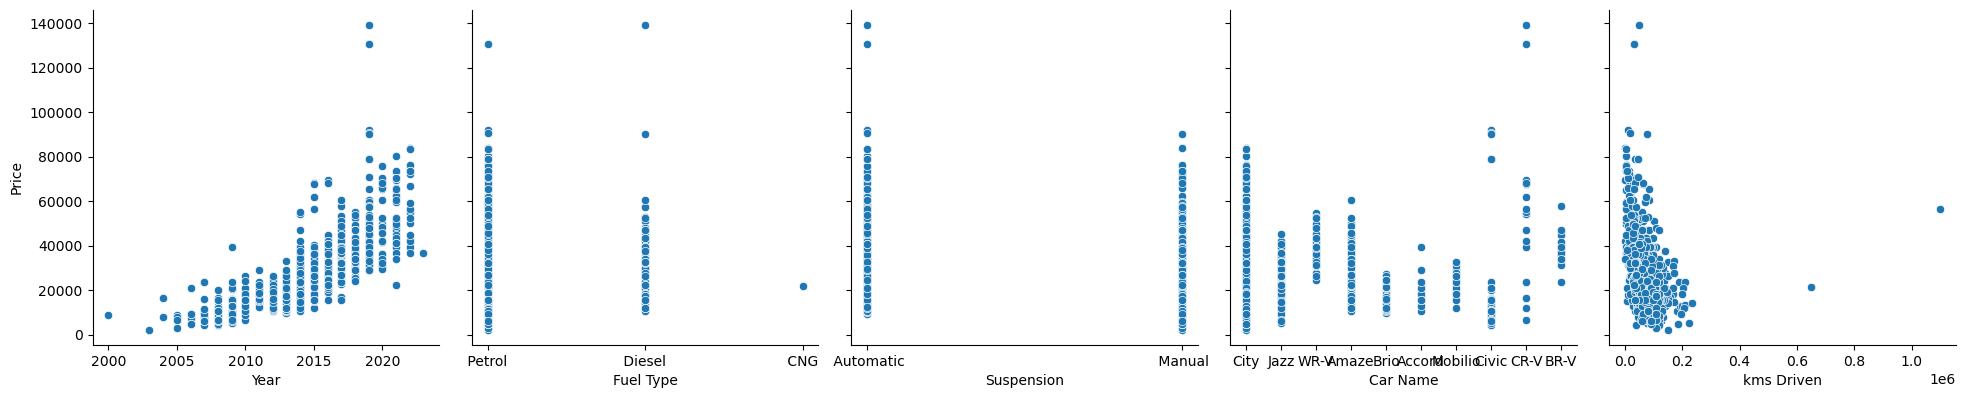

In [256]:
new_data = X.copy()
new_data["Price"] = y
sns.pairplot(new_data,x_vars=new_data.columns[:5], y_vars=new_data.columns[5], height=4)

In [257]:
X = pd.get_dummies(X,columns= ["Fuel Type","Suspension","Car Name"])

In [258]:
X.head()

,Year,kms Driven,Fuel Type_ CNG,Fuel Type_ Diesel,Fuel Type_ Petrol,Suspension_ Automatic,Suspension_ Manual,Car Name_Accord,Car Name_Amaze,Car Name_BR-V,Car Name_Brio,Car Name_CR-V,Car Name_City,Car Name_Civic,Car Name_Jazz,Car Name_Mobilio,Car Name_WR-V
0,2019,19006.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
1,2021,11936.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
2,2018,29635.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
3,2020,16163.0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0
4,2015,105114.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0


In [259]:
cols = X.columns
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(X)

X = pd.DataFrame(X,columns=cols)

In [260]:
X.head()

,Year,kms Driven,Fuel Type_ CNG,Fuel Type_ Diesel,Fuel Type_ Petrol,Suspension_ Automatic,Suspension_ Manual,Car Name_Accord,Car Name_Amaze,Car Name_BR-V,Car Name_Brio,Car Name_CR-V,Car Name_City,Car Name_Civic,Car Name_Jazz,Car Name_Mobilio,Car Name_WR-V
0,0.826087,0.016003,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.913043,0.009568,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.782609,0.025679,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.869565,0.013416,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.652174,0.094385,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [261]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=58)

In [278]:
from sklearn.ensemble import RandomForestRegressor

In [338]:
# I found the best depth with try but ı could use grid search!
rfr = RandomForestRegressor(random_state=58,max_depth=6)

In [339]:
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=6, random_state=58)

In [340]:
y_predict = rfr.predict(X_test)

In [341]:
from sklearn.metrics import r2_score
print("R2 Score = {}".format(r2_score(y_test,y_predict)))

R2 Score = 0.8957728631782761


In [342]:
# I check ovrtfit and doesn't overfit!
y_predict_train = rfr.predict(X_train)
print("R2 Score = {}".format(r2_score(y_train,y_predict_train)))

R2 Score = 0.9280018294420426
